In [22]:
import numpy as np
from keras.datasets import imdb
from keras import models
from keras import layers
from keras import losses
from keras import metrics
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 15s 1us/step


In [6]:
train_labels[0]

1

In [7]:
print(type([max(sequence) for sequence in train_data]))
max([max(sequence) for sequence in train_data])

<class 'list'>


9999

In [9]:
word_index=imdb.get_word_index()
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
decoded_review=' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [10]:
len(reverse_word_index)

88584

In [12]:
def vectorize_sequences(sequences,dimnesion=10000):
    results=np.zeros((len(sequences),dimnesion))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1
    return results

X_train=vectorize_sequences(train_data)
X_test=vectorize_sequences(test_data)

In [13]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [14]:
X_train.shape

(25000, 10000)

In [15]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [16]:
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

C:\Users\Chinmayee\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    loss=losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy]
)

In [24]:
X_val=X_train[:10000]
partial_X_train=X_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [25]:
history=model.fit(
    partial_X_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(X_val,y_val)
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 154ms/step - binary_accuracy: 0.7100 - loss: 0.5985 - val_binary_accuracy: 0.8621 - val_loss: 0.4000
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - binary_accuracy: 0.8908 - loss: 0.3505 - val_binary_accuracy: 0.8826 - val_loss: 0.3168
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - binary_accuracy: 0.9201 - loss: 0.2510 - val_binary_accuracy: 0.8867 - val_loss: 0.2846
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - binary_accuracy: 0.9390 - loss: 0.1988 - val_binary_accuracy: 0.8801 - val_loss: 0.2959
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - binary_accuracy: 0.9448 - loss: 0.1698 - val_binary_accuracy: 0.8871 - val_loss: 0.2761
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - binary_accuracy: 0.9556 - loss: 0.1448 - val_binary_accuracy: 0.8797 - val_loss: 0.3084
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - binary_accuracy: 0.9638 - loss: 0.1192 - val_binary_accuracy: 0.8845 - val_loss: 0.2901
Epoch 8/20
3

In [26]:
history_dict=history.history
history_dict.keys()

dict_keys(['binary_accuracy', 'loss', 'val_binary_accuracy', 'val_loss'])

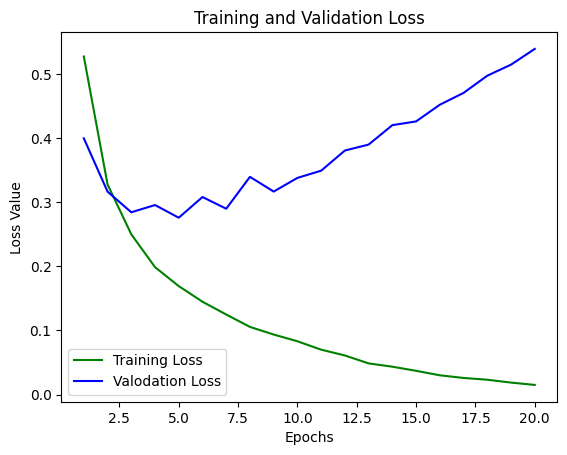

In [28]:
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,'g',label='Training Loss')
plt.plot(epochs,val_loss_values, 'b', label='Valodation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend()
plt.show()

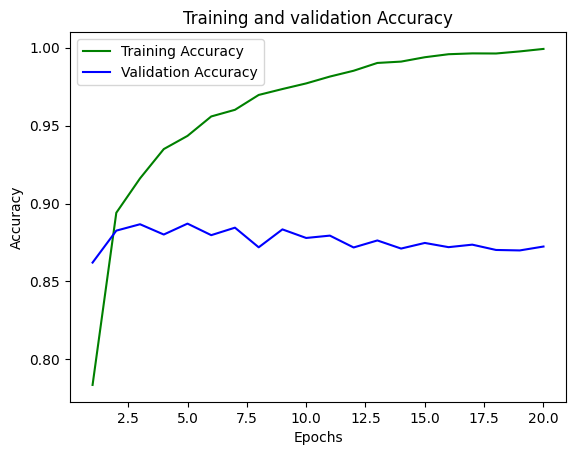

In [32]:
acc_values=history_dict['binary_accuracy']
val_acc_values=history_dict['val_binary_accuracy']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs,acc_values,'g',label="Training Accuracy")
plt.plot(epochs,val_acc_values,'b',label="Validation Accuracy")
plt.title("Training and validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [33]:
model.fit(
    partial_X_train,
    partial_y_train,
    epochs=3,
    batch_size=512,
    validation_data=(X_val,y_val)
)

Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - binary_accuracy: 0.9998 - loss: 0.0098 - val_binary_accuracy: 0.8541 - val_loss: 0.6467
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - binary_accuracy: 0.9989 - loss: 0.0132 - val_binary_accuracy: 0.8683 - val_loss: 0.5860
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - binary_accuracy: 1.0000 - loss: 0.0064 - val_binary_accuracy: 0.8687 - val_loss: 0.6067


In [34]:
np.set_printoptions(suppress=True)
result=model.predict(X_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [35]:
result

array([[0.00972713],
       [0.9999995 ],
       [0.502185  ],
       ...,
       [0.00111667],
       [0.00490588],
       [0.9088708 ]], dtype=float32)

In [36]:
y_pred=np.zeros(len(result))
for i,score in enumerate(result):
    y_pred[i]=np.round(score)

In [37]:
mae=metrics.mean_absolute_error(y_pred,y_test)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.14292>